In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile
from scipy.ndimage import rotate

## Henter bilder og beskjærer dem

In [12]:
bildedata0 = plt.imread("bilde0.tif")
bildedata1 = plt.imread("bilde1.tif")
bildedata2 = plt.imread("bilde2.tif")

bildedata0_c = bildedata0[875:1170, 400:1600]
bildedata1_rotate = rotate(bildedata1,90)
bildedata1_c_rotate = bildedata1_rotate[850:1200, 150:1600]
bildedata2_rotate = rotate(bildedata2, 45)
bildedata2_c_rotate = bildedata2_rotate[1100:1500, 550:2200]

## Skalering av data

In [13]:
tif0 = tifffile.TiffFile("bilde0.tif")
tif1 = tifffile.TiffFile("bilde1.tif")
tif2 = tifffile.TiffFile("bilde2.tif")

In [14]:
skala0 = tif0.fei_metadata['EScan']['PixelWidth']
skala1 = tif1.fei_metadata['EScan']['PixelWidth']
skala2 = tif2.fei_metadata['EScan']['PixelWidth']

## Lager plot med alle bildene

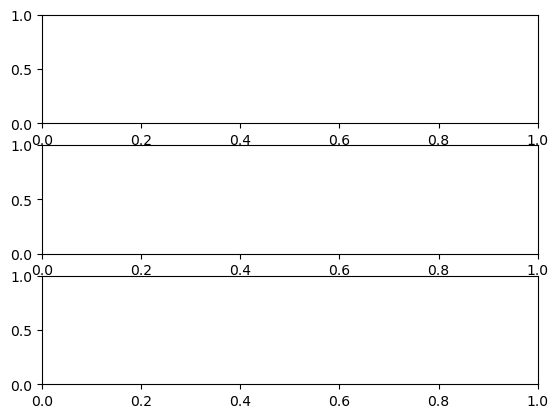

In [15]:
fig, axarr = plt.subplots(3,1)

extent0 = [0, skala0 * bildedata0_c.shape[1] * 10**6, 0 , skala0 * bildedata0_c.shape[0] * 10**6]
extent1 = [0, skala1 * bildedata1_c_rotate.shape[1] * 10**6, 0 , skala1 * bildedata1_c_rotate.shape[0] * 10**6]
extent2 = [0, skala2 * bildedata2_c_rotate.shape[1] * 10**6, 0 , skala2 * bildedata2_c_rotate.shape[0] * 10**6]

In [16]:
ax0 = axarr[0]
ax1 = axarr[1]
ax2 = axarr[2]

In [17]:
ax0.imshow(bildedata0_c, extent=extent0)
ax1.imshow(bildedata1_c_rotate, extent=extent1)
ax2.imshow(bildedata2_c_rotate, extent=extent2)

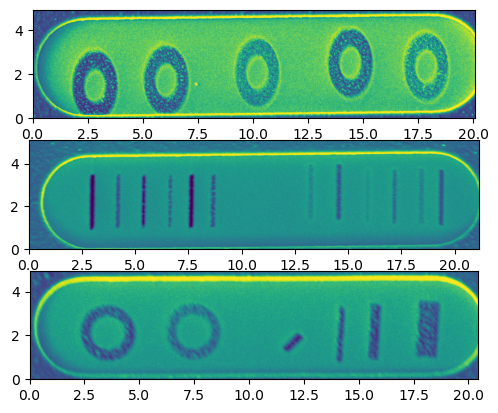

<Figure size 640x480 with 0 Axes>

In [18]:
plt.savefig("bilde.jpg")
fig

## Legge til en skalebar

In [20]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patheffects as patheffects
fontprops = fm.FontProperties(size=18)

In [21]:
scalebar_kwargs = {'size': 5, 'label': '5 um', 'loc': 4, 'frameon': False, 'color': 'white', 'size_vertical': 0.2, 'label_top': False, 'fontproperties': fontprops}
scalebar0 = AnchoredSizeBar(transform=ax0.transData, **scalebar_kwargs)
scalebar0.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax0.add_artist(scalebar0)

In [22]:
scalebar1 = AnchoredSizeBar(transform=ax1.transData, **scalebar_kwargs)
scalebar1.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax1.add_artist(scalebar1)

In [23]:
scalebar2 = AnchoredSizeBar(transform=ax2.transData, **scalebar_kwargs)
scalebar2.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax2.add_artist(scalebar2)

## Legg til annoteringer

In [21]:
ax0.annotate('a', xy=(0,0), xycoords='axes fraction', fontsize=50, color="red")
ax1.annotate('b', xy=(0,0), xycoords='axes fraction', fontsize=50, color="red")
ax2.annotate('c', xy=(0,0), xycoords='axes fraction', fontsize=50, color="red")

Text(0, 0, 'c')

In [22]:
ax0.annotate('1', xy=(1,0), xycoords='axes fraction', fontsize=50, color="red")
ax1.annotate('2', xy=(1,0), xycoords='axes fraction', fontsize=50, color="red")
ax2.annotate('3', xy=(1,0), xycoords='axes fraction', fontsize=50, color="red")

Text(1, 0, '3')

In [23]:
ax0.set_xticks([])
ax0.set_yticks([])
ax1.set_xticks([])
ax1.set_xticks([])
ax2.set_yticks([])
ax2.set_yticks([])

[]

In [24]:
fig.subplots_adjust()
fig.set_figwidth(20)
fig.set_figheight(20)

fig.get_figwidth()
fig.get_figheight()



20.0

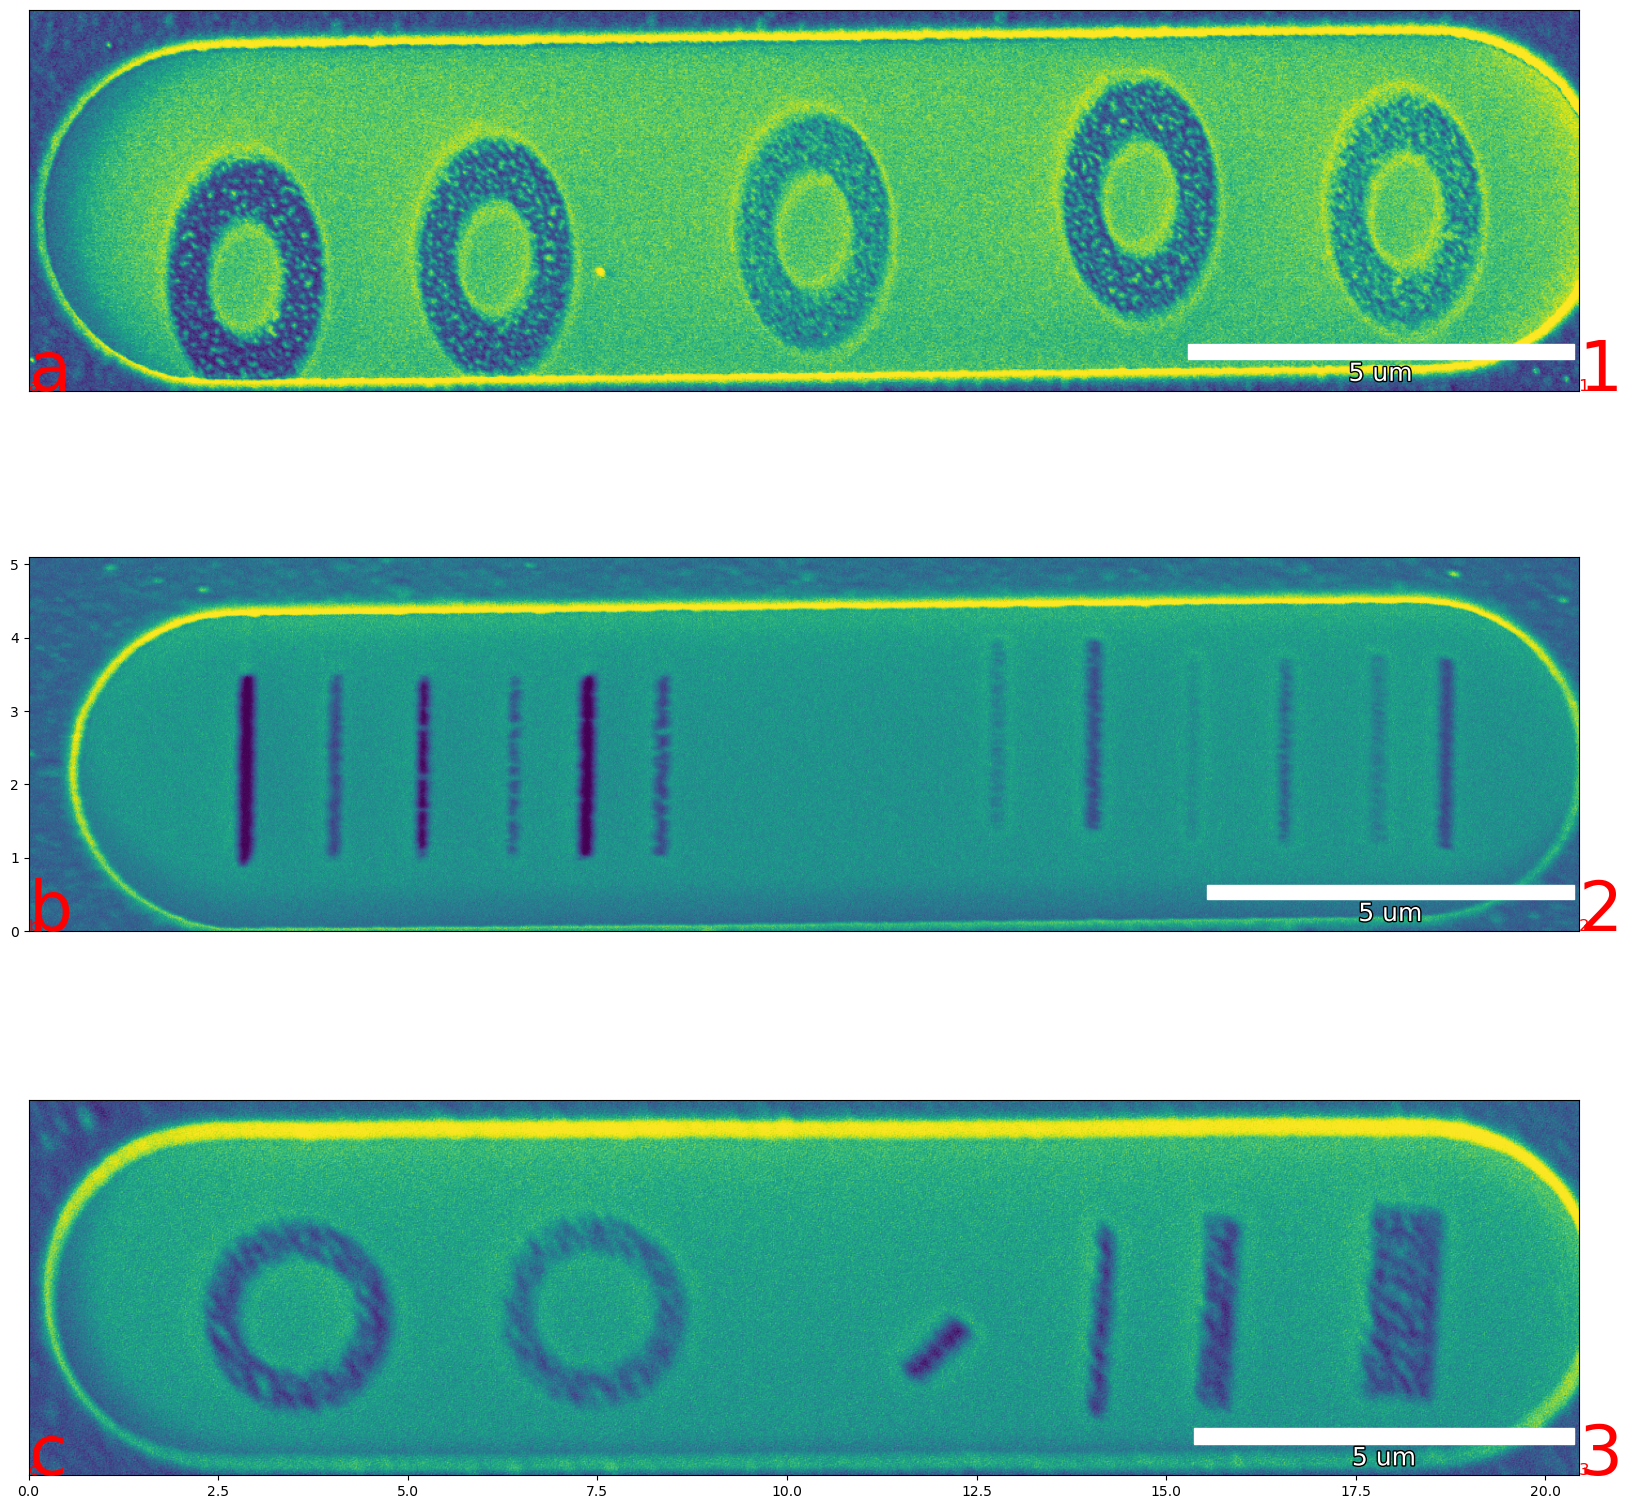

In [25]:
fig.savefig("bilde.jpg",dpi=300)
fig